In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [4]:
dataset = pd.read_csv("Salary_Data.csv")
dataset

Dataset

In [5]:
pd.DataFrame(dataset)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [54]:
X = dataset.iloc[:,0].values

In [55]:
Y = dataset.iloc[:,-1].values

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 1/3,random_state=0)

In [74]:
X_train = X_train.reshape(20,1)
Y_train = Y_train.reshape(20,1)
X_test = X_test.reshape(10,1)
Y_test = Y_test.reshape(10,1)

Note: - need to reshape because their shape is of the form(x,) and the methods being used further ahead take in arrays as inputs

### Train Split

In [76]:
pd.DataFrame(np.concatenate((X_train,Y_train),axis=1))

,0,1
0,2.9,56642.0
1,5.1,66029.0
2,3.2,64445.0
3,4.5,61111.0
4,8.2,113812.0
5,6.8,91738.0
6,1.3,46205.0
7,10.5,121872.0
8,3.0,60150.0
9,2.2,39891.0


### Test Split

In [78]:
pd.DataFrame(np.concatenate((X_test,Y_test),axis=1))

,0,1
0,1.5,37731.0
1,10.3,122391.0
2,4.1,57081.0
3,3.9,63218.0
4,9.5,116969.0
5,8.7,109431.0
6,9.6,112635.0
7,4.0,55794.0
8,5.3,83088.0
9,7.9,101302.0


Note: Feature scaling is not required in case of simple linear Regression as only one feature is present

### Fitting the Simple LinReg to the training set

In [38]:
from sklearn.linear_model import LinearRegression

In [80]:
linReg = LinearRegression()

In [82]:
linReg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Testing the regressor on the test split

creating a vector of predicted salaries

In [83]:
Y_pred =linReg.predict(X_test)

In [87]:
pd.DataFrame(np.concatenate((X_test,Y_pred,np.zeros((10,1)),Y_test),axis=1))

,0,1,2,3
0,1.5,40835.105909,0.0,37731.0
1,10.3,123079.399408,0.0,122391.0
2,4.1,65134.556261,0.0,57081.0
3,3.9,63265.367772,0.0,63218.0
4,9.5,115602.645454,0.0,116969.0
5,8.7,108125.891499,0.0,109431.0
6,9.6,116537.239698,0.0,112635.0
7,4.0,64199.962017,0.0,55794.0
8,5.3,76349.687193,0.0,83088.0
9,7.9,100649.137545,0.0,101302.0


col 1 is Y_pred and col 3 is Y_test;
get an overview of the differences 

### Visualising the results

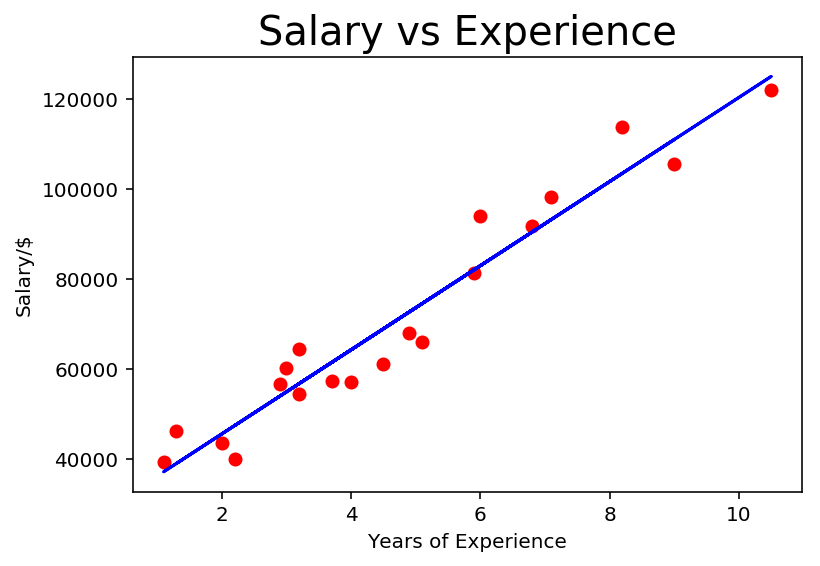

In [109]:
plt.scatter(X_train,Y_train,color = "red");
plt.plot(X_train,linReg.predict(X_train),color = "blue")
plt.title("Salary vs Experience",size = 20)
plt.xlabel("Years of Experience")
plt.ylabel("Salary/$")
plt.show()

displays how the the model performed on the training split 

In [110]:
plt.close()

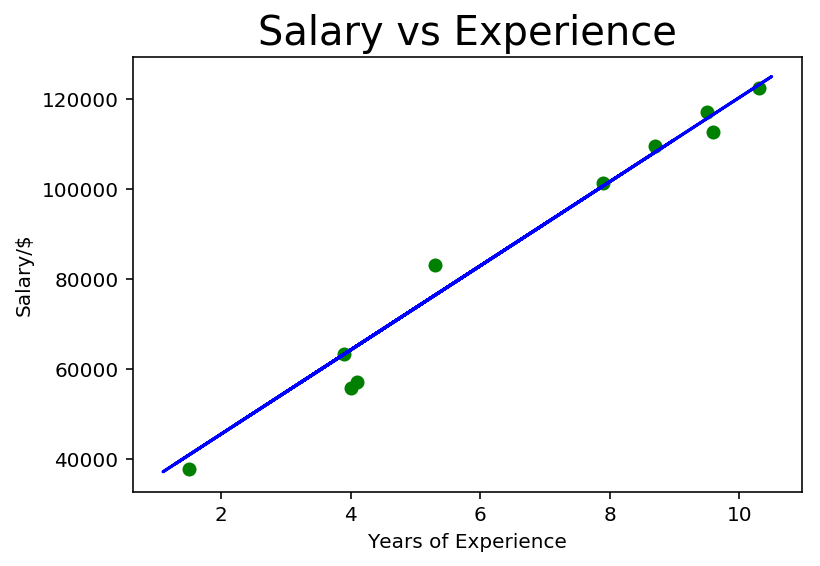

In [112]:
plt.scatter(X_test,Y_test,color="green")
plt.plot(X_train,linReg.predict(X_train),color="blue")
plt.title("Salary vs Experience",size = 20)
plt.xlabel("Years of Experience")
plt.ylabel("Salary/$")
plt.show()

displays how the regressor performed on the test split